In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_(img):
    plt.imshow(img,cmap='gray')
    plt.show()

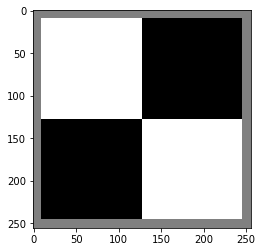

In [57]:
img = cv2.imread("data/ps1.png",0)
show_(img)

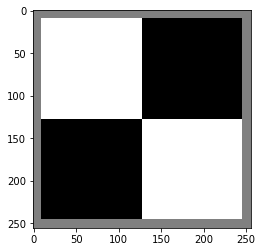

In [58]:
plt.imshow(img,cmap='gray')
h, w =img.shape

In [59]:
out = cv2.Canny(img,100,150)
show(out)

In [60]:
out.shape

(256, 256)

In [61]:
math.cos(math.radians(45))

0.7071067811865476

In [62]:
a={(i,j):0 for i in range(-800,801) for j in range(-100,101)}

In [63]:
def hough_lines_acc(img,theta=(-90,90)):
    h, w = img.shape
    angles = list(range(theta[0],theta[1]))
    print(angles[0],angles[-1],len(angles))
    width = len(angles) 
    empty = np.zeros((h*4,width))
    r = np.arange(0,h*2)
    print(width//2)
    assumed = []
    c = 0
    m = 0
    for x in range(h):
        for y in range(w):
            if img[x,y] == 255:
                c += 1
                for angle in angles:
                    rho = (x+1)*math.cos(math.radians(angle)) + (y+1)*math.sin(math.radians(angle))
                    if rho > m:
                        m = rho
                    empty[int(rho),angle+width//2] += 1
                    assumed.append((int(rho),angle+width//2))
    print(empty.shape)
    empty = np.vstack((empty[h*2:], empty[0:h*2]))
    print(c,m)
    return empty.astype(np.uint8), assumed #np.array(assumed)

In [64]:
H,assumed = hough_lines_acc(out,theta=(-90,90))

-90 89 180
90
(1024, 180)
1406 347.89653634378135


In [65]:
show(H)

In [67]:
h_inv = 255-H
show(h_inv)

In [68]:
H_f = H.flatten()
H_f[::-1].sort()
a = H_f[:10]
a.min()
H.shape
# a[::-1]

(1024, 180)

In [69]:
def hough_peaks(H, top):
    h, w = H.shape
#     print(h, w//2)
    H_f = H.flatten()
    H_f[::-1].sort()
    a = H_f[:top]
#     print(a)
    rho_out, angle_out = np.where(H>=a.min())
    rho_out = rho_out - h//2
    angle_out = angle_out-w//2
#     print(H[rho_out+512,angle_out+90])
#     print(rho_out)
#     print(angle_out)
    return (a,rho_out, angle_out)
    
    

In [70]:
peaks = hough_peaks(H,10)
peaks[0]

array([236, 235, 233, 229, 222, 129, 107,  60,  60,  60], dtype=uint8)

In [71]:
rho_out, angle_out = np.where(H>107)
print(H[rho_out,angle_out])
rho_out = rho_out - 512
angle_out = angle_out-90


[222 129 229 233 235 236]


In [72]:
for i,j in zip(rho_out, angle_out):
    print(i,j)

-246 -90
-127 -90
-8 -90
9 0
128 0
246 0


In [73]:
assumed.index((-246,0))

42300

In [74]:
assumed[42300]

(-246, 0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


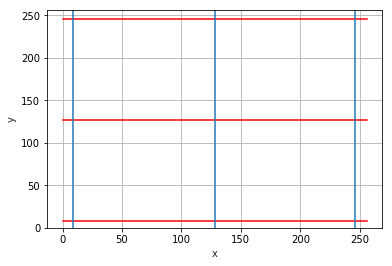

In [75]:
for d,ang in zip(rho_out, angle_out):
    x = np.linspace(0,w,100)
    plt.ylim(0,h)
    y = (d - x*np.cos(math.radians(ang)))/np.sin(math.radians(ang))
#     print(y)
    if ang == 0:
        plt.axvline(d,ymin=0,ymax=h)
    else:
        plt.plot(x, y, '-r')#,ymin=0,ymax=h)

plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')

plt.grid()
plt.show()

([9, 9], [0, 256])
([128, 128], [0, 256])
([246, 246], [0, 256])


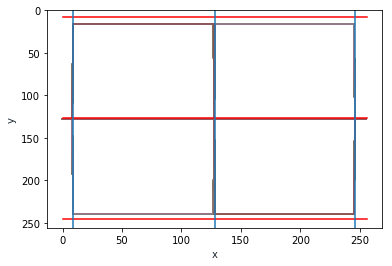

In [76]:
plt.plot(img)
for d,ang in zip(rho_out, angle_out):
    x = np.linspace(0,w,100)
#     print(y)
    if ang == 0:
        a = plt.axvline(d,ymin=0,ymax=h)
        print(a.get_data())
    else:
        y = (d - x*np.cos(math.radians(ang)))/np.sin(math.radians(ang))
        plt.plot(x, y,'-r')

# plt.plot(y, x, '-b')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.ylim(0,h)
plt.gca().invert_yaxis()
# print(plt.get())
# plt.legend(loc='upper left')
# plt.grid()
a = plt.show()

In [119]:
def hough_lines_draw(img,peaks):
    plt.imshow(img,cmap='gray')
    h,w = img.shape
    for d,ang in zip(peaks[1], peaks[2]):
        x = np.linspace(0,w,100)
    #     print(y)
        if ang == 0:
            p = 1
            a = plt.axvline(d,ymin=0,ymax=h)
#             print(a.get_data())
        else:
            y = (d - (x+1)*np.cos(math.radians(ang)))/np.sin(math.radians(ang))-1
#             x = x[0:-1]
#             y = y[0:-1]
            plt.plot(x, y,'-r')

    # plt.plot(y, x, '-b')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.ylim(0,h-1)
    plt.gca().invert_yaxis()
    # print(plt.get())
    # plt.legend(loc='upper left')
    # plt.grid()
    plt.savefig('final.png')
    plt.show()

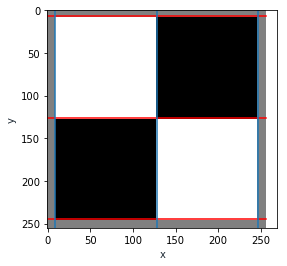

In [120]:
hough_lines_draw(img,hough_peaks(H,6))

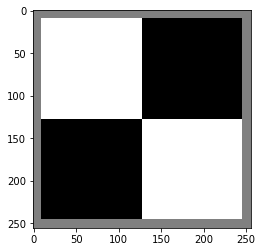

In [123]:
plt.imshow(img, cmap='gray')
plt.show()

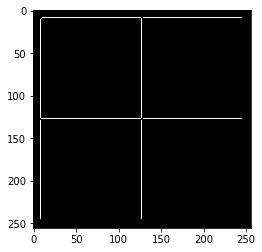

In [127]:
plt.imshow(out, cmap='gray')

In [129]:
np.cos(math.radians(45))

0.7071067811865476

In [ ]:
cv2.imwrite("out.png",H)